## Análise de Resíduos

**Importando Biliotecas**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import shapiro, norm, poisson, binom,  nbinom #
from statsmodels.formula.api import glm
from statsmodels.genmod.families import Gaussian, Poisson, Binomial

**Simulação de Dados**

In [2]:
np.random.seed(99)
x = np.random.uniform(0.5, 1.0, 200)  # 200 valores uniformes entre 0.5 e 1.0
y = np.random.poisson(lam=np.exp(x), size=200)  # 200 valores da distribuição Poisson

In [3]:
y

array([4, 3, 3, 1, 3, 1, 0, 0, 2, 2, 1, 3, 6, 3, 1, 1, 4, 5, 2, 1, 1, 3,
       1, 1, 0, 3, 5, 4, 1, 1, 2, 3, 2, 3, 1, 1, 3, 1, 0, 0, 1, 2, 4, 4,
       3, 2, 5, 3, 0, 1, 3, 2, 1, 4, 3, 5, 1, 3, 3, 2, 2, 1, 6, 2, 3, 3,
       0, 1, 2, 3, 2, 1, 4, 2, 6, 1, 5, 1, 3, 1, 2, 3, 1, 4, 1, 1, 1, 6,
       1, 1, 0, 6, 2, 2, 1, 0, 2, 0, 6, 0, 4, 3, 3, 2, 1, 3, 3, 3, 5, 2,
       2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 3, 1, 1, 2, 4, 5, 1, 2, 2, 3, 2, 5,
       2, 1, 1, 1, 2, 4, 2, 4, 3, 4, 1, 1, 3, 1, 3, 2, 0, 3, 3, 0, 3, 4,
       4, 6, 0, 3, 2, 3, 3, 7, 2, 2, 0, 2, 1, 2, 6, 2, 1, 2, 1, 1, 5, 3,
       3, 4, 2, 1, 1, 2, 1, 5, 2, 4, 2, 2, 6, 4, 3, 0, 4, 2, 1, 3, 1, 5,
       0, 4])

**Ajustando um modelo GLM com família normal**

In [4]:
model_norm = sm.GLM(y, sm.add_constant(x), family=Gaussian()).fit()

**Análise de Resíduos**

In [5]:
residuos_deviance = model_norm.resid_deviance
residuos_pearson = model_norm.resid_pearson
valores_ajustados = model_norm.fittedvalues

*Resíduos versus Valores ajustados*

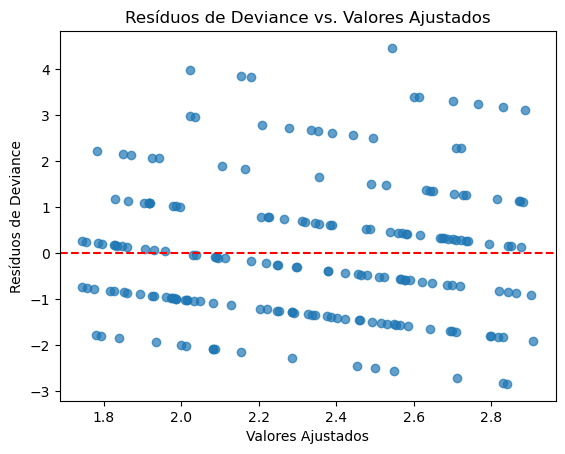

In [6]:
plt.scatter(valores_ajustados, residuos_deviance, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos de Deviance')
plt.title('Resíduos de Deviance vs. Valores Ajustados')
plt.show()

*Resíduos versus Índice*

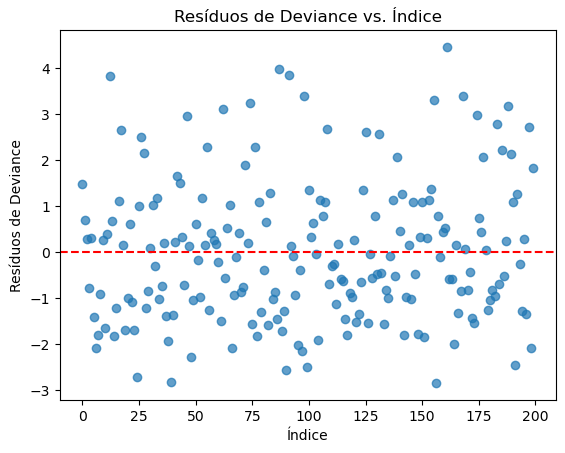

In [7]:
plt.scatter(range(len(residuos_deviance)), residuos_deviance, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Índice')
plt.ylabel('Resíduos de Deviance')
plt.title('Resíduos de Deviance vs. Índice')
plt.show()

**Ajustando um modelo GLM com família de Possion**

In [8]:
glm_poisson = glm('y ~ x', family=Poisson(), data={'x': x, 'y': y}).fit()

**Análise de Resíduos**

In [9]:
residuos_deviance = glm_poisson.resid_deviance
residuos_pearson = glm_poisson.resid_pearson
valores_ajustados = glm_poisson.fittedvalues

*Resíduos versus Valores ajustados*

Text(0.5, 1.0, 'Resíduos de Deviance vs. Valores Ajustados')

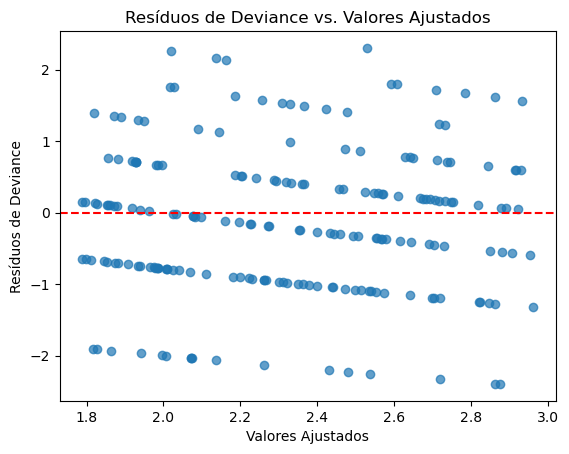

In [10]:
plt.scatter(valores_ajustados, residuos_deviance, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos de Deviance')
plt.title('Resíduos de Deviance vs. Valores Ajustados')

*Resíduos versus Índice*

In [ ]:
plt.scatter(range(len(residuos_deviance)), residuos_deviance, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Índice')
plt.ylabel('Resíduos de Deviance')
plt.title('Resíduos de Deviance vs. Índice')